In [2]:
!pip install yfinance 

  Using cached yfinance-0.2.55-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.17.9-py3-none-any.whl
  Using cached beautifulsoup4-4.13.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached yfinance-0.2.55-py2.py3-none-any.whl (109 kB)
Using cached beautifulsoup4-4.13.3-py3-none-any.whl (186 kB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
    --------------------------------------- 0.3/10.8 MB ? eta -:--:--
   -- ------------------------------------- 0.8/10.8 MB 2.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/10.8 MB 2.3 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/10.8 MB 2.7 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/10.8 MB 3.1 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [2]:
now = datetime.now()
start = datetime(now.year-10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df 

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-04-14,28.206287,28.427381,28.119190,28.362616,102098400
2015-04-15,28.313486,28.391650,28.141525,28.230856,115881600
2015-04-16,28.177250,28.384945,28.163851,28.201816,113476000
2015-04-17,27.860121,28.170546,27.795356,28.038784,207828000
2015-04-20,28.496616,28.612746,27.953930,28.043261,188217200
...,...,...,...,...,...
2025-04-07,181.460007,194.149994,174.619995,177.199997,160466300
2025-04-08,172.419998,190.339996,169.210007,186.699997,120859500


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df = df.reset_index()
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-04-14,28.206287,28.427381,28.119190,28.362616,102098400
1,2015-04-15,28.313486,28.391650,28.141525,28.230856,115881600
2,2015-04-16,28.177250,28.384945,28.163851,28.201816,113476000
3,2015-04-17,27.860121,28.170546,27.795356,28.038784,207828000
4,2015-04-20,28.496616,28.612746,27.953930,28.043261,188217200
...,...,...,...,...,...,...
2511,2025-04-07,181.460007,194.149994,174.619995,177.199997,160466300
2512,2025-04-08,172.419998,190.339996,169.210007,186.699997,120859500
2513,2025-04-09,198.850006,200.610001,171.889999,171.949997,184395900


Text(0, 0.5, 'Close Price')

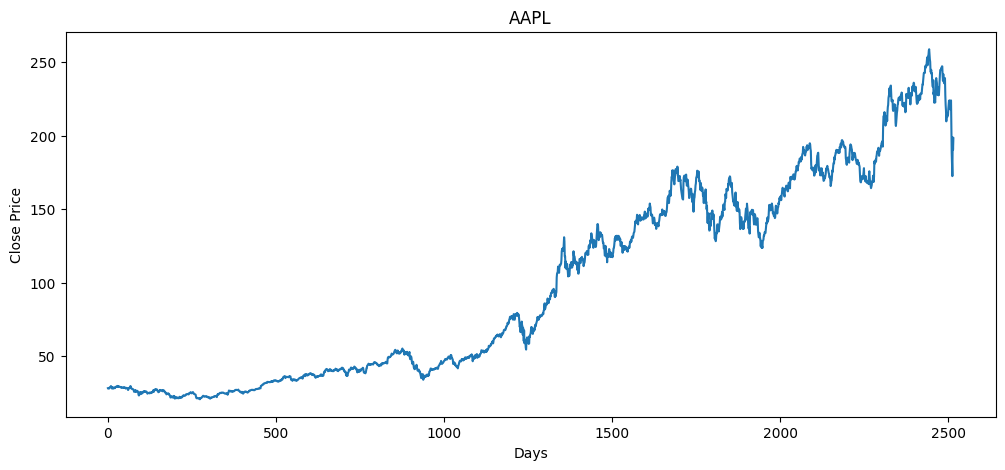

In [5]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel("Days")
plt.ylabel("Close Price")

In [6]:
df["MA_100"] = df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-04-14,28.206287,28.427381,28.119190,28.362616,102098400,NaN
1,2015-04-15,28.313486,28.391650,28.141525,28.230856,115881600,NaN
2,2015-04-16,28.177250,28.384945,28.163851,28.201816,113476000,NaN
3,2015-04-17,27.860121,28.170546,27.795356,28.038784,207828000,NaN
4,2015-04-20,28.496616,28.612746,27.953930,28.043261,188217200,NaN


Text(0, 0.5, 'Price')

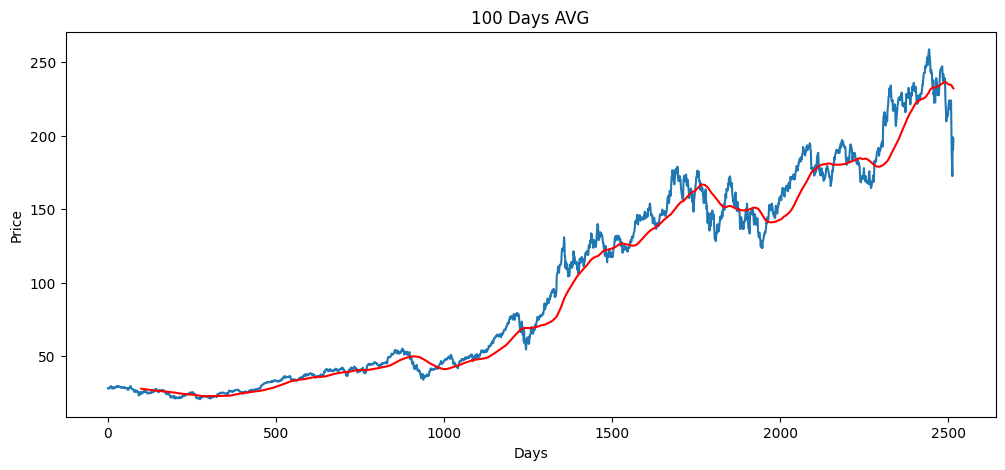

In [7]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df["MA_100"],'r')
plt.title('100 Days AVG')
plt.xlabel("Days")
plt.ylabel("Price")

In [8]:
data_tranning = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [10]:
data_tranning_array = scaler.fit_transform(data_tranning)
data_tranning_array

array([[0.04760747],
       [0.04828506],
       [0.04742393],
       ...,
       [0.95821086],
       [0.93811972],
       [0.94004803]])

In [11]:
x_train = []
y_train = []

for i in range(100, data_tranning_array.shape[0]):
    x_train.append(data_tranning_array[i-100:i])
    y_train.append(data_tranning_array[i,0])

In [12]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
x_train

array([[[0.04760747],
        [0.04828506],
        [0.04742393],
        ...,
        [0.02988237],
        [0.02270566],
        [0.02928431]],

       [[0.04828506],
        [0.04742393],
        [0.04541939],
        ...,
        [0.02270566],
        [0.02928431],
        [0.02647918]],

       [[0.04742393],
        [0.04541939],
        [0.04944261],
        ...,
        [0.02928431],
        [0.02647918],
        [0.02491276]],

       ...,

       [[0.78822623],
        [0.78791567],
        [0.80108533],
        ...,
        [0.95541171],
        [0.95354561],
        [0.97923458]],

       [[0.78791567],
        [0.80108533],
        [0.80114763],
        ...,
        [0.95354561],
        [0.97923458],
        [0.95821086]],

       [[0.80108533],
        [0.80114763],
        [0.80735983],
        ...,
        [0.97923458],
        [0.95821086],
        [0.93811972]]])

In [14]:
import sys
print(sys.version)


3.8.20 (default, Oct  3 2024, 15:19:54) [MSC v.1929 64 bit (AMD64)]


In [15]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [16]:
import tensorflow as tf

In [17]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [21]:
model = Sequential()

model.add(Input(shape=(100,1)))
model.add(LSTM(units = 128, activation = 'tanh', return_sequences = True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

In [22]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error' )
model.fit(x_train, y_train, epochs = 50 )

Epoch 1/50
52/52 [==============================] - 15s 169ms/step - loss: 0.0102
Epoch 2/50
52/52 [==============================] - 9s 171ms/step - loss: 4.4212e-04
Epoch 3/50
52/52 [==============================] - 11s 215ms/step - loss: 3.9650e-04
Epoch 4/50
52/52 [==============================] - 10s 196ms/step - loss: 4.1412e-04
Epoch 5/50
52/52 [==============================] - 10s 200ms/step - loss: 3.7557e-04
Epoch 6/50
52/52 [==============================] - 10s 195ms/step - loss: 3.6096e-04
Epoch 7/50
52/52 [==============================] - 10s 194ms/step - loss: 3.4120e-04
Epoch 8/50
52/52 [==============================] - 10s 198ms/step - loss: 3.7286e-04
Epoch 9/50
52/52 [==============================] - 10s 187ms/step - loss: 4.3999e-04
Epoch 10/50
52/52 [==============================] - 9s 180ms/step - loss: 3.1673e-04
Epoch 11/50
52/52 [==============================] - 9s 171ms/step - loss: 4.0050e-04
Epoch 12/50
52/52 [==============================] - 8s 162

In [23]:
model.save('stock_prediction_model.keras')

In [26]:
past_100_days = data_tranning.tail(100)
past_100_days

Ticker,AAPL
1661,147.420410
1662,148.403214
1663,150.850403
1664,155.155060
1665,157.789001
...,...
1756,171.530594
1757,175.594727
1758,172.268661
1759,169.090134


In [28]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,147.420410
1,148.403214
2,150.850403
3,155.155060
4,157.789001
...,...
850,181.460007
851,172.419998
852,198.850006
853,190.419998


In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.76373607e-01],
       [1.83645422e-01],
       [2.01752308e-01],
       [2.33602697e-01],
       [2.53091374e-01],
       [2.56508875e-01],
       [2.59345164e-01],
       [2.63198913e-01],
       [2.25894521e-01],
       [2.50836862e-01],
       [2.87632298e-01],
       [2.83778323e-01],
       [2.76433574e-01],
       [2.62471833e-01],
       [2.87777714e-01],
       [3.30390466e-01],
       [3.58750534e-01],
       [3.54969154e-01],
       [3.90528441e-01],
       [3.63549938e-01],
       [3.53296870e-01],
       [3.89437482e-01],
       [3.38243945e-01],
       [3.30099521e-01],
       [3.19991982e-01],
       [3.43552644e-01],
       [3.62822858e-01],
       [3.67476734e-01],
       [3.96927534e-01],
       [3.89364774e-01],
       [3.90019372e-01],
       [3.81438587e-01],
       [3.76857532e-01],
       [4.09144283e-01],
       [3.92346254e-01],
       [3.57587093e-01],
       [3.36353425e-01],
       [3.37589686e-01],
       [3.37735102e-01],
       [3.58750534e-01],


In [31]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [32]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [33]:
x_test

array([[[0.17637361],
        [0.18364542],
        [0.20175231],
        ...,
        [0.36022716],
        [0.33670906],
        [0.33896628]],

       [[0.18364542],
        [0.20175231],
        [0.2336027 ],
        ...,
        [0.33670906],
        [0.33896628],
        [0.32404015]],

       [[0.20175231],
        [0.2336027 ],
        [0.25309137],
        ...,
        [0.33896628],
        [0.32404015],
        [0.29244006]],

       ...,

       [[0.74286978],
        [0.7494477 ],
        [0.77235964],
        ...,
        [0.47943586],
        [0.42823442],
        [0.36134691]],

       [[0.7494477 ],
        [0.77235964],
        [0.74856076],
        ...,
        [0.42823442],
        [0.36134691],
        [0.55690397]],

       [[0.77235964],
        [0.74856076],
        [0.77088143],
        ...,
        [0.36134691],
        [0.55690397],
        [0.49452988]]])

In [34]:
y_predict = model.predict(x_test)

24/24 [==============================] - 2s 51ms/step


In [35]:
y_predict = scaler.inverse_transform(y_predict.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

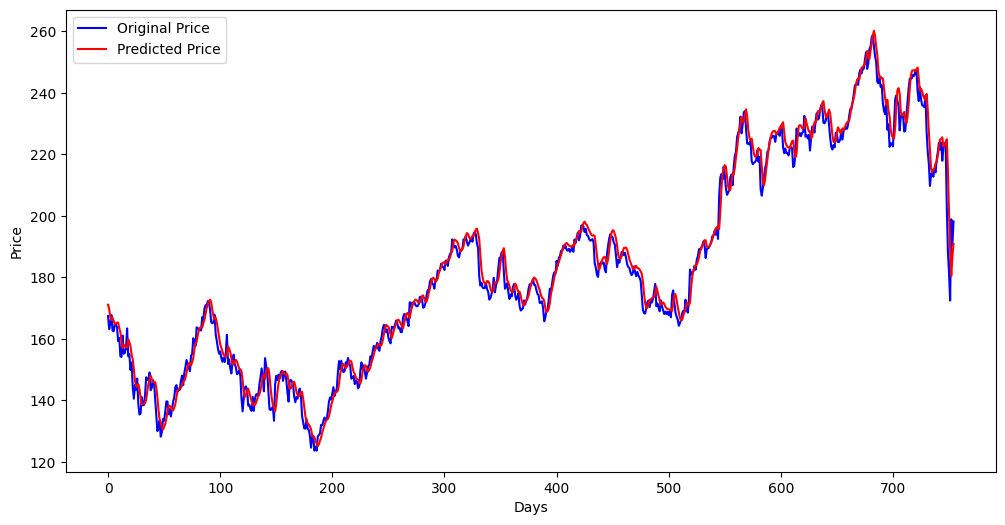

In [38]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()